<a href="https://colab.research.google.com/github/lanbowen23/CSCE636/blob/master/HW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Movie Review classification using IMDB Dataset

In [0]:
from tensorflow.keras.datasets import imdb

Load the dataset; one-hot encode the data and turn labels to arrays

In [0]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

17465344/17464789 [==============================] - 0s 0us/step


In [0]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
  # need double parenthesis
  result = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    result[i, sequence] = 1.
  return result

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [0]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

Build the Network, Complie it with loss and strategy

In [0]:
from tensorflow.keras import models
from tensorflow.keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

Partition the dataset into TRAIN and VAL set

x represents data, y represents label

In [0]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

Train the Neural Network

In [0]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs = 20,
                    batch_size = 512,
                    validation_data = (x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/20
15000/15000 [==============================] - 3s 182us/sample - loss: 0.5060 - acc: 0.7801 - val_loss: 0.3799 - val_acc: 0.8636
Epoch 2/20
15000/15000 [==============================] - 2s 131us/sample - loss: 0.2985 - acc: 0.9039 - val_loss: 0.3024 - val_acc: 0.8865
Epoch 3/20
15000/15000 [==============================] - 2s 125us/sample - loss: 0.2207 - acc: 0.9259 - val_loss: 0.2774 - val_acc: 0.8899
Epoch 4/20
15000/15000 [==============================] - 2s 126us/sample - loss: 0.1754 - acc: 0.9427 - val_loss: 0.2767 - val_acc: 0.8881
Epoch 5/20
15000/15000 [==============================] - 2s 126us/sample - loss: 0.1415 - acc: 0.9541 - val_loss: 0.2809 - val_acc: 0.8858
Epoch 6/20
15000/15000 [==============================] - 2s 125us/sample - loss: 0.1178 - acc: 0.9641 - val_loss: 0.2930 - val_acc: 0.8849
Epoch 7/20
15000/15000 [==============================] - 2s 1

In [0]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

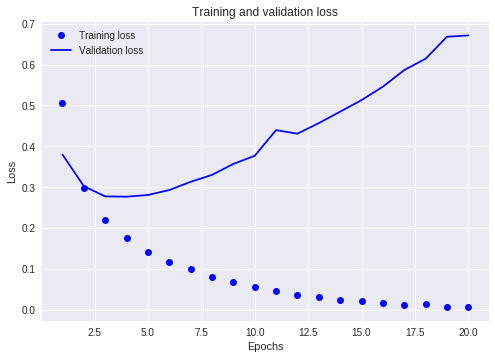

In [0]:
import matplotlib.pyplot as plt

acc = history_dict['acc'] 
val_acc = history_dict['val_acc'] 
loss = history_dict['loss'] 
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1) 
# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss') 
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss') 
plt.title('Training and validation loss') 
plt.xlabel('Epochs') 
plt.ylabel('Loss') 
plt.legend()

plt.show()

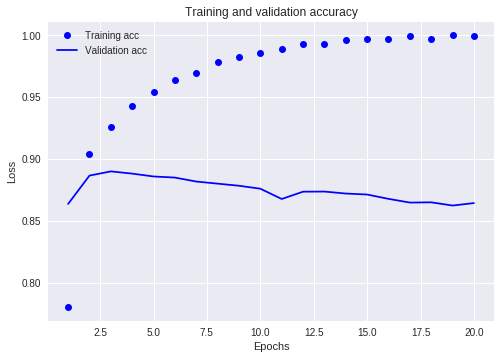

In [0]:
plt.clf() # clear figure 

acc_values = history_dict['acc'] 
val_acc_values = history_dict['val_acc']
plt.plot(epochs, acc, 'bo', label='Training acc') 
plt.plot(epochs, val_acc, 'b', label='Validation acc') 
plt.title('Training and validation accuracy') 
plt.xlabel('Epochs') 
plt.ylabel('Loss') 
plt.legend()

plt.show()

Train a new network from scratch for 4
epochs, using all the training data

In [0]:
model.fit(x_train, y_train, epochs=4, batch_size=512)

Epoch 1/4
25000/25000 [==============================] - 2s 98us/sample - loss: 0.2301 - acc: 0.9462
Epoch 2/4
25000/25000 [==============================] - 2s 92us/sample - loss: 0.1436 - acc: 0.9572
Epoch 3/4
25000/25000 [==============================] - 2s 90us/sample - loss: 0.1130 - acc: 0.9668
Epoch 4/4
25000/25000 [==============================] - 2s 89us/sample - loss: 0.0936 - acc: 0.9721


Test the Trained neural network

In [0]:
model.evaluate(x_test, y_test)

25000/25000 [==============================] - 2s 83us/sample - loss: 0.4764 - acc: 0.8608


[0.47642744681835175, 0.86084]

Use the trained network for Prediction

In [0]:
model.predict(x_test)

array([[0.00819767],
       [0.9999733 ],
       [0.90916395],
       ...,
       [0.05778548],
       [0.07345688],
       [0.811509  ]], dtype=float32)

## Multi-Classification

## Topic classification using Reuters Dataset

In [1]:
from tensorflow.keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

2113536/2110848 [==============================] - 0s 0us/step


Decode an newswire back to text

In [0]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()]) 
# Note that our indices were offset by 3
# because 0, 1 and 2 are reserved indices for "padding", "start of sequence", and "unknown". 
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

In [0]:
decoded_newswire

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

Prepare the Dataset

In [0]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000): 
  results = np.zeros((len(sequences), dimension)) 
  for i, sequence in enumerate(sequences): 
    results[i, sequence] = 1. 
  return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [0]:
def to_onehot(sequences, dimension=46):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1
  return results

y_train = to_onehot(train_labels)
y_test = to_onehot(test_labels)

Built-In way to do this

In [11]:
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

Using TensorFlow backend.


Build and Compile the network

In [4]:
from tensorflow.keras import models
from tensorflow.keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
# here change to softmax for multi-classification
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.


Seperate out the Validation set

In [0]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = y_train[:1000]
partial_y_train = one_hot_train_labels[1000:]

Train the Neural Network

In [6]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs = 20,
                    batch_size = 512,
                    validation_data = (x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/20
7982/7982 [==============================] - 2s 239us/sample - loss: 2.6704 - acc: 0.4697 - val_loss: 1.7757 - val_acc: 0.6340
Epoch 2/20
7982/7982 [==============================] - 1s 168us/sample - loss: 1.4786 - acc: 0.6987 - val_loss: 1.3361 - val_acc: 0.7240
Epoch 3/20
7982/7982 [==============================] - 1s 182us/sample - loss: 1.0883 - acc: 0.7742 - val_loss: 1.1563 - val_acc: 0.7530
Epoch 4/20
7982/7982 [==============================] - 1s 179us/sample - loss: 0.8467 - acc: 0.8250 - val_loss: 1.0653 - val_acc: 0.7700
Epoch 5/20
7982/7982 [==============================] - 1s 180us/sample - loss: 0.6711 - acc: 0.8601 - val_loss: 0.9834 - val_acc: 0.7950
Epoch 6/20
7982/7982 [==============================] - 1s 179us/sample - loss: 0.5317 - acc: 0.8918 - val_loss: 0.9445 - val_acc: 0.8160
Epoch 7/20
7982/7982 [==============================] - 1s 180us/sample - lo

Use Graphs to see If there is Overfitting

In [0]:
history_dict = history.history

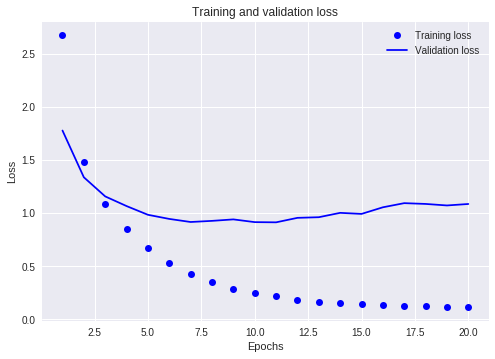

In [8]:
import matplotlib.pyplot as plt

acc = history_dict['acc'] 
val_acc = history_dict['val_acc'] 
loss = history_dict['loss'] 
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1) 
# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss') 
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss') 
plt.title('Training and validation loss') 
plt.xlabel('Epochs') 
plt.ylabel('Loss') 
plt.legend()

plt.show()

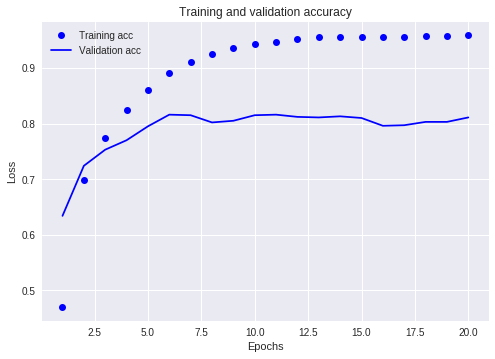

In [9]:
plt.clf() # clear figure 

acc_values = history_dict['acc'] 
val_acc_values = history_dict['val_acc']
plt.plot(epochs, acc, 'bo', label='Training acc') 
plt.plot(epochs, val_acc, 'b', label='Validation acc') 
plt.title('Training and validation accuracy') 
plt.xlabel('Epochs') 
plt.ylabel('Loss') 
plt.legend()

plt.show()

Train the network using more reasonable Epochs

In [12]:
model.fit(partial_x_train, 
          partial_y_train, 
          epochs=9,
          batch_size=512, 
          validation_data=(x_val, y_val)) 
results = model.evaluate(x_test, one_hot_test_labels)

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 1s 155us/sample - loss: 0.0970 - acc: 0.9572 - val_loss: 1.1816 - val_acc: 0.7920
Epoch 2/9
7982/7982 [==============================] - 1s 171us/sample - loss: 0.0949 - acc: 0.9574 - val_loss: 1.1900 - val_acc: 0.7920
Epoch 3/9
7982/7982 [==============================] - 1s 183us/sample - loss: 0.0943 - acc: 0.9595 - val_loss: 1.2474 - val_acc: 0.7930
Epoch 4/9
7982/7982 [==============================] - 1s 179us/sample - loss: 0.0934 - acc: 0.9590 - val_loss: 1.2328 - val_acc: 0.7860
Epoch 5/9
7982/7982 [==============================] - 1s 177us/sample - loss: 0.0922 - acc: 0.9593 - val_loss: 1.2770 - val_acc: 0.7850
Epoch 6/9
7982/7982 [==============================] - 1s 178us/sample - loss: 0.0907 - acc: 0.9595 - val_loss: 1.2648 - val_acc: 0.7930
Epoch 7/9
7982/7982 [==============================] - 1s 178us/sample - loss: 0.0921 - acc: 0.9575 - val_loss: 1.2307 - val_acc: 

In [13]:
results

[1.5183477681976074, 0.76936775]

Use trained model for Prediction

In [14]:
predictions = model.predict(x_test)
print(predictions[0].shape)
print(np.sum(predictions[0]))
print(np.argmax(predictions[0]))

(46,)
1.0
3


## Regression

## Predicting House Prices using Boston Housing Price Dataset (which is a regression problem)

### Load the Dataset

In [1]:
from keras.datasets import boston_housing

(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

Using TensorFlow backend.


57344/57026 [==============================] - 0s 3us/step


In [2]:
test_targets.shape

(102,)

### Prepare the Datasets

In [0]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std
test_data -= mean
test_data /= std

### Build the network

In [0]:
from keras import models
from keras import layers
def build_model():
  # Because we will need to instantiate
  # the same model multiple time,
  # we use a function to construct it.
  model = models.Sequential()
  model.add(layers.Dense(64, activation='relu',
  input_shape=(train_data.shape[1],)))
  model.add(layers.Dense(64, activation='relu'))
  model.add(layers.Dense(1))
  model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
  return model

K-fold Validation

In [21]:
import numpy as np


k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []

for i in range(k):
  print('processing fold #', i)
  # Prepare the validation data: data from partition # k
  val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
  val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
  # Prepare the training data: data from all other partitions
  partial_train_data = np.concatenate(
    [train_data[:i * num_val_samples],
    train_data[(i + 1) * num_val_samples:]],
    axis=0)
  partial_train_targets = np.concatenate(
    [train_targets[:i * num_val_samples],
    train_targets[(i + 1) * num_val_samples:]],
    axis=0)
  # Build the Keras model (already compiled)
  model = build_model()
  # Train the model (in silent mode, verbose=0)
  model.fit(partial_train_data, partial_train_targets,
            epochs=num_epochs, batch_size=1, verbose=0)
  # Evaluate the model on the validation data
  val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
  all_scores.append(val_mae)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [22]:
all_scores

[1.993725864013823, 2.224157387667363, 2.935743745010678, 2.3145967249823087]

In [23]:
np.mean(all_scores)

2.3670559304185432

#### Let’s try training the network for a bit longer: 500 epochs. 
To keep a record of how
well the model did at each epoch, we will modify our training loop to save the per-epoch
validation score log

In [8]:
import numpy as np

k = 4
num_val_samples = len(train_data) // k
num_epochs = 500
all_mae_histories = []


for i in range(k):
  print('processing fold #', i)
  # Prepare the validation data: data from partition # k
  val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
  val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
  # Prepare the training data: data from all other partitions
  partial_train_data = np.concatenate(
    [train_data[:i * num_val_samples],
    train_data[(i + 1) * num_val_samples:]],
    axis=0)
  partial_train_targets = np.concatenate(
    [train_targets[:i * num_val_samples],
    train_targets[(i + 1) * num_val_samples:]],
    axis=0)
  # Build the Keras model (already compiled)
  model = build_model()
  # Train the model (in silent mode, verbose=0)
  history = model.fit(partial_train_data, partial_train_targets,
    validation_data=(val_data, val_targets),
    epochs=num_epochs, batch_size=1, verbose=0)
  mae_history = history.history['val_mean_absolute_error']
  all_mae_histories.append(mae_history)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [0]:
average_mae_history = [
  np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

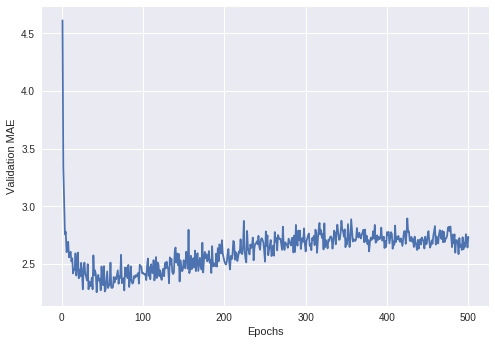

In [10]:
import matplotlib.pyplot as plt
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

#### hard to see the plot due to scaling issues and relatively high variance.
- Omit the first 10 data points, which are on a different scale from the rest of the curve.
- Replace each point with an exponential moving average of the previous points, to obtain
a smooth curve.

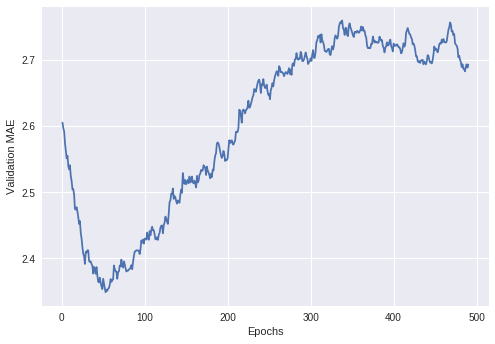

In [11]:
def smooth_curve(points, factor=0.9):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * (1 - factor))
    else:
      smoothed_points.append(point)
  return smoothed_points

smooth_mae_history = smooth_curve(average_mae_history[10:])

plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

### train the final model

In [12]:
# Get a fresh, compiled model.
model = build_model()
# Train it on the entirety of the data.
model.fit(train_data, train_targets,
          epochs=80, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

102/102 [==============================] - 0s 876us/step


In [13]:
test_mae_score

2.675912473715988